# Week 12 - Milestone Two week

# 1. Lesson: no lesson this week.  Milestone Two is due!

# 2. Weekly graph question

Suppose you plot the number visitors to a museum over the seven days of a week; then again the following week.  Can you suggest the advantages and disadvantages of the following two ways of presenting the data?

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of visitors')

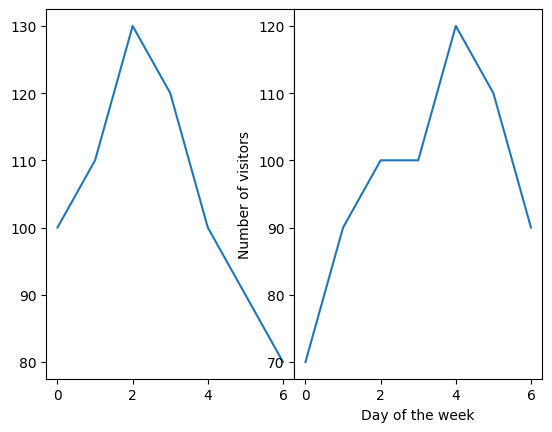

In [6]:
np.random.seed(0)
time_series_0 = np.array([100, 110, 130, 120, 100, 90, 80])
time_series_1 = np.array([70, 90, 100, 100, 120, 110, 90])
fig, axs = plt.subplots(1, 2)
axs[0].plot(time_series_0)
axs[1].plot(time_series_1)
plt.subplots_adjust(wspace = 0)
plt.xlabel("Day of the week")
plt.ylabel("Number of visitors")

Text(0, 0.5, 'Number of visitors')

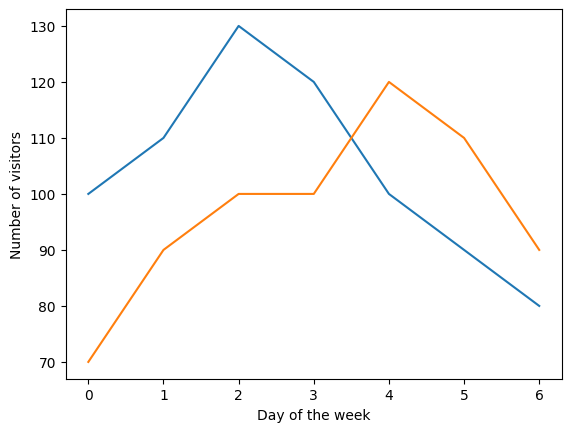

In [7]:
plt.plot(time_series_0)
plt.plot(time_series_1)
plt.xlabel("Day of the week")
plt.ylabel("Number of visitors")

# 3. Working on your datasets

This week, you can work on Milestone Two rather than having a particular exercise about working on your datasets

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 187-205 of the Storytelling With Data book as best you can. (Chapter Eight). You do not have to get the exact data values right, just the overall look and feel.

### Storytelling Graph: Mortality Risk Comparison (CKD vs. Non-CKD)

The slope graph above compares the difference in 28-day mortality to 90-day mortality for patients both with and without chronic kidney disease (CKD). As you can see, CKD patients have a higher rate of mortality throughout the time period, and the difference slightly increases over time.

This graph is a simplified style from a graph in the Storytelling With Data book (chapter 8). I wanted something simple that showed both direction and magnitude of the differences in the outcome.

This information could be useful for clinical decision making, such as flagging CKD patients for additional post-discharge support or closer follow up.


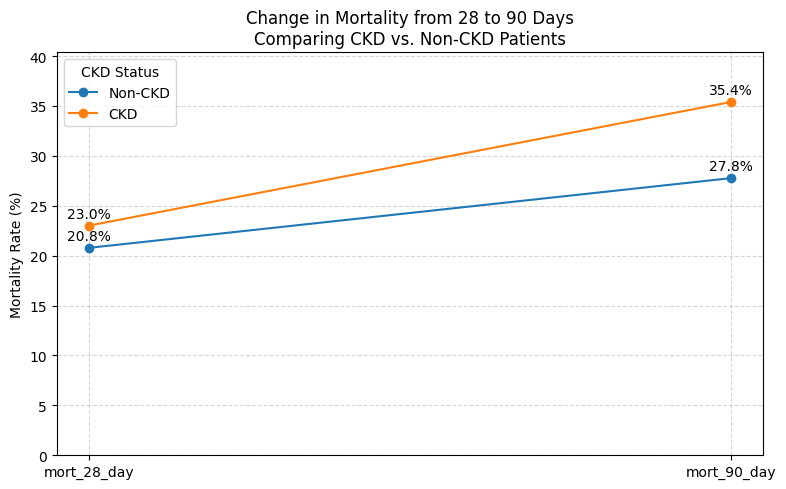

In [8]:
# Slope Graph: Comparing Mortality Rates of CKD vs. Non-CKD Patients (28 vs. 90 Days)
# As part of our final project, I wanted to explore whether CKD patients have higher mortality over time.
# This graph compares 28-day and 90-day mortality between patients with and without CKD.

import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the AKI dataset 
aki_df = pd.read_csv("acute_kidney_injury.csv")  

# Grouping by CKD status and calculating average mortality at 28 and 90 days
mortality_slope = aki_df.groupby("ckd")[["mort_28_day", "mort_90_day"]].mean() * 100
mortality_slope = mortality_slope.rename(index={0: "Non-CKD", 1: "CKD"})

# Transposing for plotting (time points on x-axis)
mortality_slope_plot = mortality_slope.T
mortality_slope_plot.columns.name = None

# Plotting the slope graph
fig, ax = plt.subplots(figsize=(8, 5))

# Drawing lines for CKD and Non-CKD groups
for group in mortality_slope_plot.columns:
    ax.plot(mortality_slope_plot.index, mortality_slope_plot[group], marker='o', label=group)
    for i, val in enumerate(mortality_slope_plot[group]):
        ax.text(mortality_slope_plot.index[i], val + 0.5, f"{val:.1f}%", ha='center', va='bottom')

# Adding title, labels, and styling
ax.set_title("Change in Mortality from 28 to 90 Days\nComparing CKD vs. Non-CKD Patients")
ax.set_ylabel("Mortality Rate (%)")
ax.set_ylim(0, max(mortality_slope_plot.max()) + 5)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(title="CKD Status")
plt.tight_layout()

# Saving the graph to file
fig.savefig("slope_graph_ckd_mortality.png")
